<a href="https://colab.research.google.com/github/sunithapillai/datasharing/blob/master/cnn10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split

import tensorflow as tf

In [5]:

# Visualization
def draw_vector(v0, v1, color='k', ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->', linewidth=2, shrinkA=0, shrinkB=0, color=color)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

def plot(X, y, pca=None, lda=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.2)

    if pca is not None:
        # draw first component
        length, vector = pca.explained_variance_[0], pca.components_[0]
        v = vector / np.sqrt(vector**2)
        draw_vector(pca.mean_, pca.mean_ + v)

    if lda is not None:
        # draw first component
        length, vector = lda.intercept_[0], lda.coef_[0]
        v = vector / np.sqrt(vector**2)
        draw_vector(lda.xbar_, lda.xbar_ + v, color='r')

    plt.axis('equal')
    plt.show()

def show_images(imgs, num_rows, num_cols):
    assert len(imgs) == num_rows*num_cols

    for i in range(num_rows):
        row = None
        for j in range(num_cols):
            if row is None:
                row = imgs[i*num_cols+j]
            else:
                row = np.concatenate((row, imgs[i*num_cols+j]), axis=1)
        plt.imshow(row, cmap='gray')
        plt.axis('off')
        plt.show()

# Visualization
def plotldaoutput(X, y, lda=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.2)

    if lda is not None:
        # draw first two components
        length, vector = lda.intercept_[0], lda.coef_[0][:2]
        v = vector / np.sqrt(vector**2)
        draw_vector(lda.xbar_[:2], lda.xbar_[:2] + v, color='r')

    plt.axis('equal')
    plt.show()

def plot_confusion(cm):
    plt.rcParams["figure.figsize"] = (15,15)
    fig, ax = plt.subplots()
    c= ax.matshow(cm, cmap='copper')
    fig.colorbar(c, ax=ax)
    for i in range(len(cm)):
        for j in range(len(cm[0])):
            text = ax.text(j, i, cm[i, j], ha='center', va='center', color='w', fontsize=10, weight='bold')
    plt.xticks(range(40))
    plt.yticks(range(40))
    plt.show()






In [9]:


# Get the dataset

faces = fetch_olivetti_faces()

_, img_height, img_width = faces.images.shape

print(faces.images.shape)


x_train, x_test, y_train, y_test = train_test_split(faces.images, faces.target, test_size=0.2, random_state=0)

print(x_train.shape)

print (x_test.shape)

(400, 64, 64)
(320, 64, 64)
(80, 64, 64)


In [20]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(filters=6, kernel_size=(10, 10), activation='relu', input_shape=(64, 64, 1)))
model.add(tf.keras.layers.MaxPool2D())
model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=(10, 10), activation='relu'))
model.add(tf.keras.layers.MaxPool2D())
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=120, activation='relu'))
model.add(tf.keras.layers.Dense(units=84, activation='relu'))
model.add(tf.keras.layers.Dense(units=40, activation = 'softmax'))

print(model.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 55, 55, 6)         606       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 27, 27, 6)        0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 18, 18, 16)        9616      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 9, 9, 16)         0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 1296)              0         
                                                                 
 dense_12 (Dense)            (None, 120)              

In [21]:
learning_rate = 0.001
loss_function = 'sparse_categorical_crossentropy'
batch_size = 32
num_epochs = 50

Epoch 1/50
10/10 [==============================] - 4s 239ms/step - loss: 3.7184 - accuracy: 0.0156 - val_loss: 3.6930 - val_accuracy: 0.0125
Epoch 2/50
10/10 [==============================] - 2s 203ms/step - loss: 3.6880 - accuracy: 0.0281 - val_loss: 3.6932 - val_accuracy: 0.0125
Epoch 3/50
10/10 [==============================] - 2s 202ms/step - loss: 3.6874 - accuracy: 0.0250 - val_loss: 3.6944 - val_accuracy: 0.0125
Epoch 4/50
10/10 [==============================] - 2s 258ms/step - loss: 3.6853 - accuracy: 0.0375 - val_loss: 3.6973 - val_accuracy: 0.0375
Epoch 5/50
10/10 [==============================] - 3s 305ms/step - loss: 3.6833 - accuracy: 0.0344 - val_loss: 3.7015 - val_accuracy: 0.0250
Epoch 6/50
10/10 [==============================] - 2s 213ms/step - loss: 3.6779 - accuracy: 0.0406 - val_loss: 3.7107 - val_accuracy: 0.0500
Epoch 7/50
10/10 [==============================] - 2s 205ms/step - loss: 3.6710 - accuracy: 0.0594 - val_loss: 3.7311 - val_accuracy: 0.0375
Epoch 

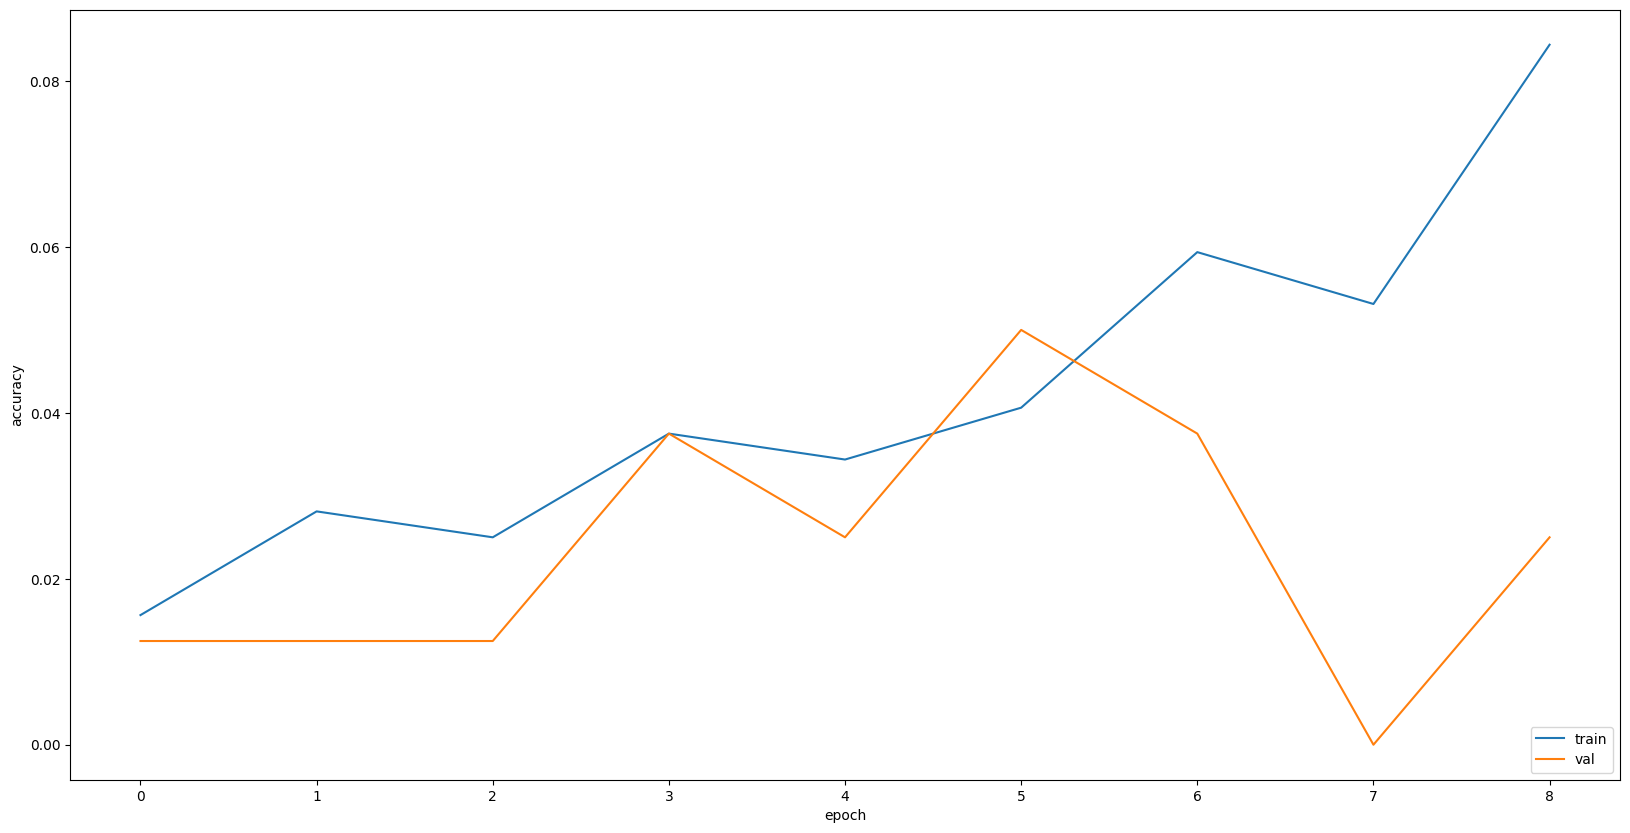

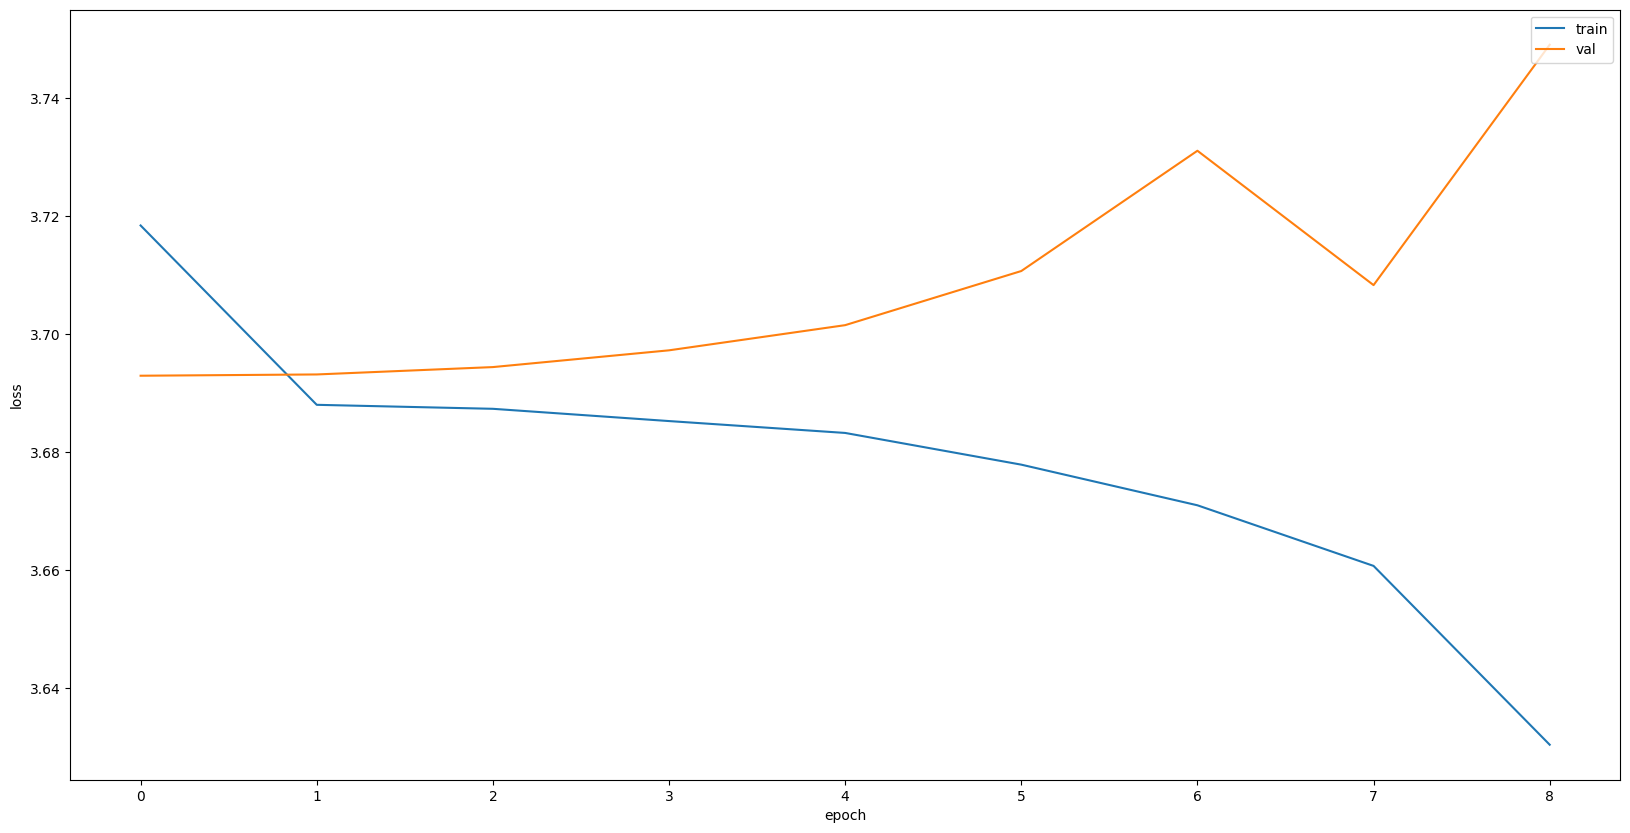

In [22]:
# training configuration
optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss=loss_function, metrics=['accuracy'])

early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', mode='max', patience=3, verbose=1)
model_save = tf.keras.callbacks.ModelCheckpoint(filepath='best_model.h5', monitor='val_accuracy', save_best_only=True)

#train
history = model.fit(x=x_train,y=y_train, epochs=num_epochs, batch_size=batch_size, validation_data=(x_test, y_test), callbacks=[early_stop, model_save])

plt.rcParams["figure.figsize"] = (20,10)

# accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

# loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()